## PRANCŪZIJOS ĮMONIŲ APYVARTA IR VYKDYTOS VEIKLOS 2007-2016 m.

  1. Hipotezė: ekonominė(finansinė) krizė turėjo įtakos įmonių apyvartai(?)
  2. Veiklos, pasiekusios didžiausią apyvartą, duotuoju laikotarpiu? 
  3. Veiklos, pasiekusios mažiausią apyvartą, duotuoju laikotarpiu?
    

Sąvokos:
    APE (activité principale exercée) - pagrindinė vykdoma veikla; 
    Chiffres d’affaires nets - grynoji įmonės apyvarta
    

APE makes it possible to identify the main branch of activity of the company.
For instance : 47.11C can be interpret as :
Section : G Commerce ; réparation d'automobiles et de motocycles
Division : 47 Commerce de détail, à l'exception des automobiles et des motocycles
Groupe : 47.1 Commerce de détail en magasin non spécialisé
Classe : 47.11 Commerce de détail en magasin non spécialisé à prédominance alimentaire
Sous classe : 47.11C Supérettes

In [144]:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [145]:
mydb = mysql.connector.connect(
    host = 'localhost', 
    port = '3317',
    user = 'root',
    password = '***'
)

cursor = mydb.cursor()
cursor.execute('USE nauja_dirbti')
dff = pd.read_sql('SELECT index_number, ape, ape_name, label FROM ape_fusion', con=mydb)


In [146]:
df = pd.read_csv('C:\\Users\\eglep\\OneDrive\\Bureau\\Vilnius coding school\\PYTHON\\Darbas\\ape_fusion.csv', index_col=0)

In [147]:
vykdoma = df[['ape', 'ape_name', 'Libellé']]
vykdoma

,ape,ape_name,Libellé
0,1020Z,"Transform. & conserv. poisson, crustacés & mol...",Industrie manufacturière
1,812,Activités de nettoyage,Activités de services administratifs et de sou...
2,1610B,Imprégnation du bois,Industrie manufacturière
3,0910Z,Activités de soutien à l'extraction d'hydrocar...,Industries extractives
4,7420Z,Activités photographiques,"Activités spécialisées, scientifiques et techn..."
...,...,...,...
1668,2051,Fabrication de produits explosifs,Industrie manufacturière
1669,1431,Fabrication d'articles chaussants à mailles,Industrie manufacturière
1670,9525,Réparation d'articles d'horlogerie et de bijou...,Autres activités de services
1671,3211,Frappe de monnaie,Industrie manufacturière


In [148]:
vykdoma_veikla = vykdoma.dropna()

In [151]:
FD = pd.read_csv('C:\\Users\\eglep\\OneDrive\\Bureau\\Vilnius coding school\\PYTHON\\Darbas\\data_kaggle.csv',
                    index_col=0)
FD

C:\Users\eglep\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,year,"Autres impôts, taxes et versements assimilés",Ventes de marchandises,Production vendue biens,Production vendue services,Chiffres d’affaires nets,Production stockée,Production immobilisée,Subventions d’exploitation,"Reprises sur amortissements et provisions, transfert de charges",...,ape_groupe,ape_classe,ape_sous_classe,ess_N° IDENTITE ENTREPRISE (SIREN),ess_RAISON SOCIALE,ess_ENSEIGNE,ess_SIGLE,ess_CP VILLE,ess_FORME JURIDIQUE,is_ess
0,1919.0,NaN,2143339.0,189049.0,72029.0,2404417.0,NaN,NaN,NaN,6403.0,...,701.0,7010.0,7010Z,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2007.0,NaN,327650.0,NaN,19396.0,347046.0,NaN,NaN,NaN,9280.0,...,466.0,4662.0,4662Z,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2008.0,NaN,18849.0,NaN,847996.0,866844.0,NaN,NaN,NaN,5626.0,...,701.0,7010.0,7010Z,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2009.0,NaN,268569.0,NaN,758.0,269327.0,NaN,NaN,NaN,4054.0,...,466.0,4662.0,4662Z,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2009.0,NaN,24207.0,NaN,1173.0,25380.0,NaN,NaN,NaN,NaN,...,466.0,4669.0,4669C,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2016.0,NaN,NaN,14834011.0,35613.0,14869624.0,NaN,NaN,1000.0,223594.0,...,433.0,4333.0,4333Z,NaN,NaN,NaN,NaN,NaN,NaN,False
99996,2016.0,NaN,1602399.0,3155597.0,1837610.0,6595606.0,77695.0,NaN,NaN,411190.0,...,81.0,812.0,0812Z,NaN,NaN,NaN,NaN,NaN,NaN,False
99997,2016.0,NaN,NaN,611222.0,NaN,611222.0,NaN,NaN,NaN,5857.0,...,472.0,4722.0,4722Z,NaN,NaN,NaN,NaN,NaN,NaN,False
99998,2016.0,NaN,NaN,NaN,19586.0,19586.0,NaN,NaN,NaN,NaN,...,662.0,6622.0,6622Z,NaN,NaN,NaN,NaN,NaN,NaN,False


In [152]:
FD.describe()

,year,"Autres impôts, taxes et versements assimilés",Ventes de marchandises,Production vendue biens,Production vendue services,Chiffres d’affaires nets,Production stockée,Production immobilisée,Subventions d’exploitation,"Reprises sur amortissements et provisions, transfert de charges",...,Montant de la TVA. collectée,Total TVA. déductible sur biens et services,Dividendes,siren,enthic,ape_len,ape_division,ape_groupe,ape_classe,ess_N° IDENTITE ENTREPRISE (SIREN)
count,100000.000000,0.0,3.372600e+04,1.471600e+04,7.234500e+04,8.724400e+04,1.317000e+04,3.843000e+03,1.331500e+04,4.767000e+04,...,1.801000e+04,1.839900e+04,2.199000e+03,1.000000e+05,98608.000000,98608.000000,98608.000000,98608.000000,98608.000000,4.210000e+02
mean,2014.702840,NaN,6.471795e+06,2.698839e+07,1.587540e+06,5.660321e+06,1.541834e+04,6.371170e+05,5.787882e+04,2.162146e+05,...,4.160794e+05,2.934100e+05,2.967542e+05,5.068991e+08,845.292076,4.998286,56.024744,563.103531,5633.209577,4.214226e+08
std,0.838906,NaN,7.304842e+07,2.253714e+09,1.675157e+07,7.009078e+07,2.069038e+06,8.606552e+06,8.933368e+05,9.712673e+06,...,4.462102e+06,4.191736e+06,1.204212e+06,1.692721e+08,511.684275,0.041363,18.081448,180.210596,1801.733337,1.961189e+08
min,1919.000000,NaN,-6.519753e+06,-1.273126e+07,-8.697778e+08,-3.217514e+07,-7.418596e+07,-7.304187e+06,-1.636410e+05,-1.650519e+06,...,-4.127710e+05,-1.466330e+05,-4.000000e+04,5.420120e+06,0.000000,4.000000,0.000000,0.000000,0.000000,5.650148e+06
25%,2014.000000,NaN,5.332550e+04,4.015800e+04,4.360000e+04,1.237538e+05,-1.606125e+04,7.506500e+03,1.392000e+03,2.084250e+03,...,2.222125e+04,7.291000e+03,2.800000e+04,4.030743e+08,316.000000,5.000000,46.000000,463.000000,4634.000000,3.032741e+08
50%,2015.000000,NaN,3.704805e+05,4.222865e+05,1.925160e+05,4.525650e+05,8.705000e+02,3.166000e+04,3.500000e+03,8.557000e+03,...,7.013650e+04,3.192600e+04,7.200000e+04,4.894499e+08,882.000000,5.000000,56.000000,561.000000,5610.000000,3.807086e+08
75%,2015.000000,NaN,1.566350e+06,2.061948e+06,7.334630e+05,1.522934e+06,2.542625e+04,1.503930e+05,1.110000e+04,3.779875e+04,...,2.035662e+05,1.088275e+05,2.000000e+05,5.342671e+08,1335.000000,5.000000,69.000000,691.000000,6910.000000,5.101543e+08
max,2016.000000,NaN,5.080573e+09,2.732734e+11,2.266566e+09,7.442405e+09,9.511900e+07,4.474379e+08,8.112332e+07,1.968355e+09,...,4.202754e+08,4.067239e+08,3.006202e+07,9.986404e+08,1672.000000,5.000000,96.000000,960.000000,9609.000000,8.159802e+08


In [168]:
FD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 88 columns):
 #   Column                                                                    Non-Null Count   Dtype  
---  ------                                                                    --------------   -----  
 0   year                                                                      100000 non-null  float64
 1   Autres impôts, taxes et versements assimilés                              0 non-null       float64
 2   Ventes de marchandises                                                    33726 non-null   float64
 3   Production vendue biens                                                   14716 non-null   float64
 4   Production vendue services                                                72345 non-null   float64
 5   Chiffres d’affaires nets                                                  87244 non-null   float64
 6   Production stockée                                   

In [19]:
#FD.drop(['ape_groupe'], axis=1, inplace=True)


In [169]:
FD.sort_values(by=['year'], ascending=True)
FD

,year,"Autres impôts, taxes et versements assimilés",Ventes de marchandises,Production vendue biens,Production vendue services,Chiffres d’affaires nets,Production stockée,Production immobilisée,Subventions d’exploitation,"Reprises sur amortissements et provisions, transfert de charges",...,ape_groupe,ape_classe,ape_sous_classe,ess_N° IDENTITE ENTREPRISE (SIREN),ess_RAISON SOCIALE,ess_ENSEIGNE,ess_SIGLE,ess_CP VILLE,ess_FORME JURIDIQUE,is_ess
0,1919.0,NaN,2143339.0,189049.0,72029.0,2404417.0,NaN,NaN,NaN,6403.0,...,701.0,7010.0,7010Z,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2007.0,NaN,327650.0,NaN,19396.0,347046.0,NaN,NaN,NaN,9280.0,...,466.0,4662.0,4662Z,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2008.0,NaN,18849.0,NaN,847996.0,866844.0,NaN,NaN,NaN,5626.0,...,701.0,7010.0,7010Z,NaN,NaN,NaN,NaN,NaN,NaN,False
3,2009.0,NaN,268569.0,NaN,758.0,269327.0,NaN,NaN,NaN,4054.0,...,466.0,4662.0,4662Z,NaN,NaN,NaN,NaN,NaN,NaN,False
4,2009.0,NaN,24207.0,NaN,1173.0,25380.0,NaN,NaN,NaN,NaN,...,466.0,4669.0,4669C,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2016.0,NaN,NaN,14834011.0,35613.0,14869624.0,NaN,NaN,1000.0,223594.0,...,433.0,4333.0,4333Z,NaN,NaN,NaN,NaN,NaN,NaN,False
99996,2016.0,NaN,1602399.0,3155597.0,1837610.0,6595606.0,77695.0,NaN,NaN,411190.0,...,81.0,812.0,0812Z,NaN,NaN,NaN,NaN,NaN,NaN,False
99997,2016.0,NaN,NaN,611222.0,NaN,611222.0,NaN,NaN,NaN,5857.0,...,472.0,4722.0,4722Z,NaN,NaN,NaN,NaN,NaN,NaN,False
99998,2016.0,NaN,NaN,NaN,19586.0,19586.0,NaN,NaN,NaN,NaN,...,662.0,6622.0,6622Z,NaN,NaN,NaN,NaN,NaN,NaN,False


In [170]:
FD[FD['ape_sous_classe'].isin(['4633Z'])]

,year,"Autres impôts, taxes et versements assimilés",Ventes de marchandises,Production vendue biens,Production vendue services,Chiffres d’affaires nets,Production stockée,Production immobilisée,Subventions d’exploitation,"Reprises sur amortissements et provisions, transfert de charges",...,ape_groupe,ape_classe,ape_sous_classe,ess_N° IDENTITE ENTREPRISE (SIREN),ess_RAISON SOCIALE,ess_ENSEIGNE,ess_SIGLE,ess_CP VILLE,ess_FORME JURIDIQUE,is_ess
315,2012.0,NaN,3.688646e+08,52715.0,1960671.0,3.708780e+08,NaN,NaN,NaN,NaN,...,463.0,4633.0,4633Z,NaN,NaN,NaN,NaN,NaN,NaN,False
347,2012.0,NaN,1.003733e+09,NaN,3123448.0,1.006856e+09,NaN,NaN,3500.0,347517.0,...,463.0,4633.0,4633Z,NaN,NaN,NaN,NaN,NaN,NaN,False
348,2012.0,NaN,4.353803e+08,NaN,5644842.0,4.410251e+08,NaN,NaN,NaN,NaN,...,463.0,4633.0,4633Z,NaN,NaN,NaN,NaN,NaN,NaN,False
553,2012.0,NaN,1.707619e+06,NaN,9855.0,1.717474e+06,NaN,NaN,NaN,NaN,...,463.0,4633.0,4633Z,NaN,NaN,NaN,NaN,NaN,NaN,False
1902,2013.0,NaN,NaN,23932664.0,483506.0,2.441617e+07,-9983.0,NaN,NaN,8280.0,...,463.0,4633.0,4633Z,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97768,2016.0,NaN,1.931138e+06,NaN,NaN,1.931138e+06,NaN,NaN,NaN,66169.0,...,463.0,4633.0,4633Z,NaN,NaN,NaN,NaN,NaN,NaN,False
97819,2016.0,NaN,1.348878e+07,15378.0,926.0,1.350508e+07,NaN,NaN,3200.0,5162.0,...,463.0,4633.0,4633Z,NaN,NaN,NaN,NaN,NaN,NaN,False
97998,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,463.0,4633.0,4633Z,NaN,NaN,NaN,NaN,NaN,NaN,False
98349,2016.0,NaN,1.411975e+07,-337.0,161387.0,1.428080e+07,NaN,NaN,3000.0,18904.0,...,463.0,4633.0,4633Z,NaN,NaN,NaN,NaN,NaN,NaN,False


In [171]:
apyvarta_pagal_metus = FD[['year', 'Chiffres d’affaires nets', 'ape_sous_classe']]
apyvarta_pagal_metus

,year,Chiffres d’affaires nets,ape_sous_classe
0,1919.0,2404417.0,7010Z
1,2007.0,347046.0,4662Z
2,2008.0,866844.0,7010Z
3,2009.0,269327.0,4662Z
4,2009.0,25380.0,4669C
...,...,...,...
99995,2016.0,14869624.0,4333Z
99996,2016.0,6595606.0,0812Z
99997,2016.0,611222.0,4722Z
99998,2016.0,19586.0,6622Z


In [118]:
apyvarta = apyvarta_pagal_metus[apyvarta_pagal_metus['Chiffres d’affaires nets'].notna()]

In [119]:
apyvarta_metai = apyvarta[(apyvarta['year'] > 2006)]

In [153]:
apyvarta_metai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87243 entries, 1 to 99999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      87243 non-null  float64
 1   Chiffres d’affaires nets  87243 non-null  float64
 2   ape_sous_classe           85871 non-null  object 
dtypes: float64(2), object(1)
memory usage: 2.7+ MB


In [155]:
vppm = (apyvarta_metai.groupby(['year'])['Chiffres d’affaires nets'].sum()).round().astype('int64').reset_index()
vppm

,year,Chiffres d’affaires nets
0,2007.0,347046
1,2008.0,866844
2,2009.0,294707
3,2010.0,588197
4,2011.0,30390173
5,2012.0,5649701708
6,2013.0,32247017849
7,2014.0,91694738169
8,2015.0,222406307780
9,2016.0,141796376603


### Prancūzijos įmonių grynoji apyvarta 2007-2016 m.

In [121]:
metine_apyvarta=vppm.reset_index().astype('int64')
metine_apyvarta   # max.Du šimtai dvidešimt du milijardai keturi šimtai šeši milijonai trys šimtai septyni tūkstančiai

,index,year,Chiffres d’affaires nets
0,0,2007,347046
1,1,2008,866844
2,2,2009,294707
3,3,2010,588197
4,4,2011,30390173
5,5,2012,5649701708
6,6,2013,32247017849
7,7,2014,91694738169
8,8,2015,222406307780
9,9,2016,141796376603


Text(0.5, 1.0, 'Grynoji apyvarta 2007-2016 m')

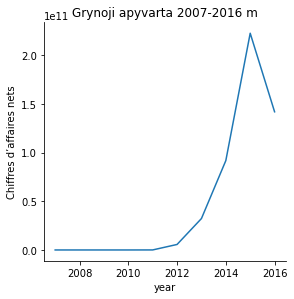

In [156]:
sns.relplot(x="year", y="Chiffres d’affaires nets",
    height=4, ci=None, kind="line", data=metine_apyvarta)

plt.title('Grynoji apyvarta 2007-2016 m')

Išvada: duomenys patvirtina hipotezę, jog ekonominės krizės metais (2008-2009 m.) įmonės Prancūzijoje patyrė 
pastebimus nuostolius, tuo tarpu krizei pasibaigus, praėjus keliems metams, matomas ženklus apyvartos kilimas.
Ryškiausias grynosios apyvartos išaugimas - 2012 m. Bendra įmonių apyvarta per metus išaugo net 186 kartus.

### Veiklos, pasiekusios didžiausią apyvartą, Prancūzijoje 2007-2016 m.

In [66]:
# veikla_apyvarta = metine_apyvarta[(metine_apyvarta['ape_sous_classe'].notna() & metine_apyvarta['Chiffres d’affaires nets'].notna()) & (metine_apyvarta['year'] > 2006)]

In [123]:
veiklos = (veikla_apyvarta.groupby(['ape_sous_classe'])['Chiffres d’affaires nets'].sum()).round().astype('int64').sort_values(ascending=False).reset_index()
pelningiausios_veiklos = veiklos.head(10)
pelningiausios_veiklos


,ape_sous_classe,Chiffres d’affaires nets
0,4633Z,30485118690
1,4617A,23829247632
2,7022Z,23372777571
3,7010Z,16742174273
4,1011Z,15686719487
5,4711F,14948117845
6,4511Z,11036534538
7,4669B,9172177385
8,1051C,8724860009
9,4669A,6725851807


In [157]:
veiklos_sritis = vykdoma_veikla[vykdoma_veikla['ape'].isin(['4633Z', '4617A', '7022Z', '7010Z', '1011Z', '4711F', '4511Z', '4669B', '1051C', '4669A' ])]
veiklos_sritis

,ape,ape_name,Libellé
97,4669B,Commerce de gros de fournitures et équipements...,Commerce ; réparation d'automobiles et de moto...
118,4511Z,Commerce de voitures et de véhicules automobil...,Commerce ; réparation d'automobiles et de moto...
173,4633Z,"Com. gros produits laitiers, oeufs, huiles & m...",Commerce ; réparation d'automobiles et de moto...
286,4711F,Hypermarchés,Commerce ; réparation d'automobiles et de moto...
314,7022Z,Conseil pour les affaires et autres conseils d...,"Activités spécialisées, scientifiques et techn..."
362,7010Z,Activités des sièges sociaux,"Activités spécialisées, scientifiques et techn..."
834,1011Z,Transformation et conservation de la viande de...,Industrie manufacturière
1104,1051C,Fabrication de fromage,Industrie manufacturière
1577,4617A,Centrales d'achat alimentaires,Commerce ; réparation d'automobiles et de moto...
1596,4669A,Commerce de gros de matériel électrique,Commerce ; réparation d'automobiles et de moto...


In [125]:
right = pelningiausios_veiklos.set_index(['ape_sous_classe'])

In [126]:
left = veiklos_sritis.set_index(['ape'])

In [127]:
left.join(right).sort_values(by='Chiffres d’affaires nets')

,ape_name,Libellé,Chiffres d’affaires nets
ape,,,
4669A,Commerce de gros de matériel électrique,Commerce ; réparation d'automobiles et de moto...,6725851807
1051C,Fabrication de fromage,Industrie manufacturière,8724860009
4669B,Commerce de gros de fournitures et équipements...,Commerce ; réparation d'automobiles et de moto...,9172177385
4511Z,Commerce de voitures et de véhicules automobil...,Commerce ; réparation d'automobiles et de moto...,11036534538
4711F,Hypermarchés,Commerce ; réparation d'automobiles et de moto...,14948117845
1011Z,Transformation et conservation de la viande de...,Industrie manufacturière,15686719487
7010Z,Activités des sièges sociaux,"Activités spécialisées, scientifiques et techn...",16742174273
7022Z,Conseil pour les affaires et autres conseils d...,"Activités spécialisées, scientifiques et techn...",23372777571
4617A,Centrales d'achat alimentaires,Commerce ; réparation d'automobiles et de moto...,23829247632


In [79]:
# apyvarta_TOP10 = apyvarta_metai[(apyvarta_metai['Chiffres d’affaires nets'].notna()) & 
#                                 (apyvarta_metai['Chiffres d’affaires nets'].sum()).round().astype('int64')]


In [158]:
df = left.join(right).sort_values(by='Chiffres d’affaires nets', ascending=False)

In [55]:
# pln_veiklos_TOP10['Chiffres d’affaires nets'].round().astype('int64')

In [161]:
df

,ape_name,Libellé,Chiffres d’affaires nets
ape,,,
4633Z,"Com. gros produits laitiers, oeufs, huiles & m...",Commerce ; réparation d'automobiles et de moto...,30485118690
4617A,Centrales d'achat alimentaires,Commerce ; réparation d'automobiles et de moto...,23829247632
7022Z,Conseil pour les affaires et autres conseils d...,"Activités spécialisées, scientifiques et techn...",23372777571
7010Z,Activités des sièges sociaux,"Activités spécialisées, scientifiques et techn...",16742174273
1011Z,Transformation et conservation de la viande de...,Industrie manufacturière,15686719487
4711F,Hypermarchés,Commerce ; réparation d'automobiles et de moto...,14948117845
4511Z,Commerce de voitures et de véhicules automobil...,Commerce ; réparation d'automobiles et de moto...,11036534538
4669B,Commerce de gros de fournitures et équipements...,Commerce ; réparation d'automobiles et de moto...,9172177385
1051C,Fabrication de fromage,Industrie manufacturière,8724860009


In [163]:
df['%'] = ((df['Chiffres d’affaires nets'] / df['Chiffres d’affaires nets'].sum())*100).round(2).astype(str) + '%'
df

,ape_name,Libellé,Chiffres d’affaires nets,%
ape,,,,
4633Z,"Com. gros produits laitiers, oeufs, huiles & m...",Commerce ; réparation d'automobiles et de moto...,30485118690,18.97%
4617A,Centrales d'achat alimentaires,Commerce ; réparation d'automobiles et de moto...,23829247632,14.83%
7022Z,Conseil pour les affaires et autres conseils d...,"Activités spécialisées, scientifiques et techn...",23372777571,14.54%
7010Z,Activités des sièges sociaux,"Activités spécialisées, scientifiques et techn...",16742174273,10.42%
1011Z,Transformation et conservation de la viande de...,Industrie manufacturière,15686719487,9.76%
4711F,Hypermarchés,Commerce ; réparation d'automobiles et de moto...,14948117845,9.3%
4511Z,Commerce de voitures et de véhicules automobil...,Commerce ; réparation d'automobiles et de moto...,11036534538,6.87%
4669B,Commerce de gros de fournitures et équipements...,Commerce ; réparation d'automobiles et de moto...,9172177385,5.71%
1051C,Fabrication de fromage,Industrie manufacturière,8724860009,5.43%


In [164]:
df['key'] = ((df['Chiffres d’affaires nets'] / df['Chiffres d’affaires nets'].sum())*100).round(2).astype('float')
df

,ape_name,Libellé,Chiffres d’affaires nets,%,key
ape,,,,,
4633Z,"Com. gros produits laitiers, oeufs, huiles & m...",Commerce ; réparation d'automobiles et de moto...,30485118690,18.97%,18.97
4617A,Centrales d'achat alimentaires,Commerce ; réparation d'automobiles et de moto...,23829247632,14.83%,14.83
7022Z,Conseil pour les affaires et autres conseils d...,"Activités spécialisées, scientifiques et techn...",23372777571,14.54%,14.54
7010Z,Activités des sièges sociaux,"Activités spécialisées, scientifiques et techn...",16742174273,10.42%,10.42
1011Z,Transformation et conservation de la viande de...,Industrie manufacturière,15686719487,9.76%,9.76
4711F,Hypermarchés,Commerce ; réparation d'automobiles et de moto...,14948117845,9.3%,9.30
4511Z,Commerce de voitures et de véhicules automobil...,Commerce ; réparation d'automobiles et de moto...,11036534538,6.87%,6.87
4669B,Commerce de gros de fournitures et équipements...,Commerce ; réparation d'automobiles et de moto...,9172177385,5.71%,5.71
1051C,Fabrication de fromage,Industrie manufacturière,8724860009,5.43%,5.43


In [165]:
pp = df

In [166]:
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']

<function matplotlib.pyplot.show(close=None, block=None)>

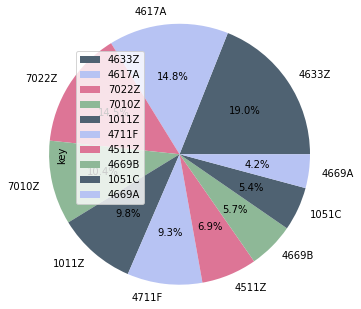

In [175]:
pp.iloc[0:10].plot.pie(x = 'ape', y = 'key', autopct='%1.1f%%', radius=1.5, colors=colors)
plt.show

Išvada: 'pie chart' išryškėja trys veiklos sritys, kurios duotu laikotarpiu jose dirbančioms įmonėms atnešė didžiausią pelną: didmeninė prekyba pieno produktais, kiaušiniais ir pan., prekybos centrai, verslo konsultavimo veiklos. 
Nemažai sričių susijusių su maisto kultūra (be pagrindinės: mėsos perdirbimo, konservavimo sritys, sūrių gamyba).

### Veiklos, pasiekusios mažiausią apyvartą, Prancūzijoje 2007-2016 m.

In [136]:
veiklos = (veikla_apyvarta.groupby(['ape_sous_classe'])['Chiffres d’affaires nets'].sum()).round().astype('int64').sort_values(ascending=True).reset_index()
nuostolingiausios_veiklos = veiklos.head(10)
nuostolingiausios_veiklos

,ape_sous_classe,Chiffres d’affaires nets
0,1031Z,-4301
1,3513Z,15435
2,0145Z,59202
3,3091Z,89428
4,8423Z,92258
5,2891Z,106018
6,1106Z,124950
7,7722Z,140314
8,8430B,142480
9,1420Z,183879


In [137]:
veiklos_sritis1 = vykdoma_veikla[vykdoma_veikla['ape'].isin(['1031Z', '3513Z', '0145Z', '3091Z', '8423Z', '2891Z', '1106Z', '7722Z', '8430B', '1420Z'])]


In [138]:
right1 = nuostolingiausios_veiklos.set_index(['ape_sous_classe'])

In [139]:
left1 = veiklos_sritis1.set_index(['ape'])

In [140]:
left1.join(right1).sort_values(by='Chiffres d’affaires nets', ascending=True)

,ape_name,Libellé,Chiffres d’affaires nets
ape,,,
1031Z,Transformation et conservation de pommes de terre,Industrie manufacturière,-4301
3513Z,Distribution d'électricité,"Production et distribution d'électricité, de g...",15435
0145Z,Élevage d'ovins et de caprins,"Agriculture, sylviculture et pêche",59202
3091Z,Fabrication de motocycles,Industrie manufacturière,89428
8423Z,Justice,Administration publique,92258
2891Z,Fabrication de machines pour la métallurgie,Industrie manufacturière,106018
1106Z,Fabrication de malt,Industrie manufacturière,124950
7722Z,Location de vidéocassettes et disques vidéo,Activités de services administratifs et de sou...,140314
8430B,Gestion des retraites complémentaires,Administration publique,142480


In [141]:
pln_veiklos_nuost10 = left1.join(right1).sort_values(by='Chiffres d’affaires nets', ascending=True)


In [142]:
pln_veiklos_nuost10.to_csv('pln_veiklos_nuost10.csv')

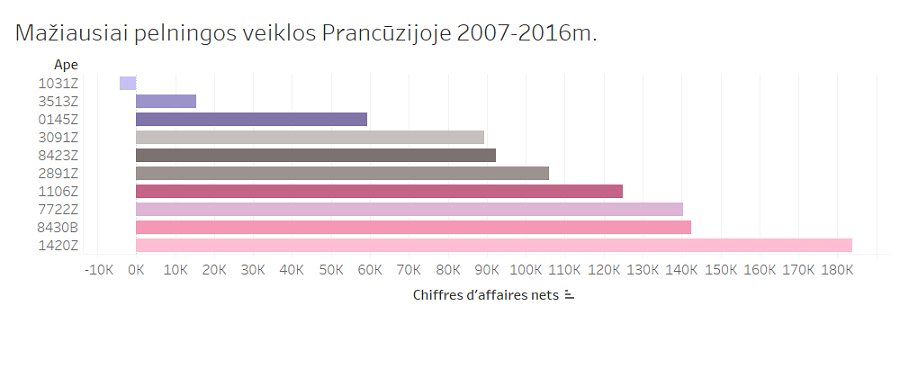

Dažniausiai veiklos, turinčios mažiausias apyvartas, siejasi su gamybos pramonės bei viešojo administravimo sritimis.
Vis dėl to pastebimai išsiskira bulvių perdirbimo ir konservavimo veikla.

## IŠVADOS

1. Hipotezė patvirtinta: duomenys parodė, jog ekonominės(finansinės) krizės metais įmonių apyvarta buvo ženkliai mažesnė, 
o nuo 2012 m. pastebimai išaugo, pasiekdama aukščiausius skaičius - 2015 m.
2. Didžiausios apyvartos duotuoju laikotarpiu pasiektos šiose srityse: 
    - didmeninė prekyba pieno produktais, kiaušiniais, maistiniais aliejais ir pan.(prekyba)
    - prekyba maisto produktais (prekybos centrai)
    - verslo konsultacijos ir patariamųjų struktūrų vadybos/valdymo klausimais veikla (įv. specializuotos, moksl. ir tech. veiklos)
Maisto kultūra šioje šalyje dar kartą užsitvirtina savo vietą.
3. Mažiausiai pelningos veiklos duotuoju laikotarpiu:
    - bulvių perdirbimas ir konservavimas (gamybos pramonė)
    - elektros paskirstymas 
    - avių ir ožkų auginimas